In [11]:
#Reading dataset

In [12]:
import intake
var= ["ua", "va", "ts", "pr"]
col = intake.open_esm_datastore("/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cmip6.json")
#cat=col.search(activity_id="CMIP", source_id="CESM2",experiment_id="1pctCO2", variable_id=var,
# table_id="Amon", grid_label="gn")
cat=col.search(activity_id="CMIP", source_id="CESM2",experiment_id="1pctCO2", variable_id="ua",
table_id="Amon", grid_label="gn")

In [13]:
cat.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
174393,CMIP,NCAR,CESM2,1pctCO2,r1i1p1f1,Amon,ua,gn,NaN,v20190425,000101-005012,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
174394,CMIP,NCAR,CESM2,1pctCO2,r1i1p1f1,Amon,ua,gn,NaN,v20190425,010101-015012,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
174395,CMIP,NCAR,CESM2,1pctCO2,r1i1p1f1,Amon,ua,gn,NaN,v20190425,005101-010012,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...


In [14]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, cdf_kwargs={'chunks': {}, 'decode_times': False})


xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'ua' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


In [15]:
dset_dict.keys()

dict_keys(['CMIP.NCAR.CESM2.1pctCO2.Amon.gn'])

In [16]:
ds = dset_dict['CMIP.NCAR.CESM2.1pctCO2.Amon.gn']

In [17]:
ds

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 1, nbnd: 2, plev: 19, time: 1800)
Coordinates:
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) float64 14.5 44.0 73.5 ... 5.467e+04 5.47e+04 5.473e+04
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: nbnd
Data variables:
    time_bnds  (time, nbnd) float64 dask.array<chunksize=(600, 2), meta=np.ndarray>
    lat_bnds   (lat, nbnd) float64 -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    lon_bnds   (lon, nbnd) float64 -0.625 0.625 0.625 ... 358.1 358.1 359.4
    ua         (member_id, time, plev, lat, lon) float32 dask.array<chunksize=(1, 600, 19, 192, 288), meta=np.ndarray>
Attributes:
    parent_source_id:       CESM2
    source_type:            AOGCM BGC AER
    external_variables:     areacell

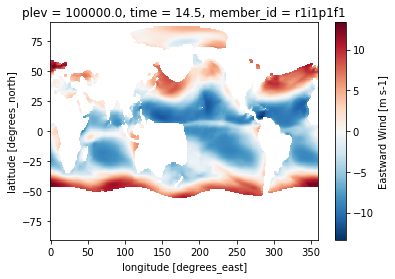

In [19]:
%matplotlib inline
ds.ua.isel(time=0, plev=0, member_id=0).plot()

In [20]:
pwd

'/glade/u/home/afahad/cmip6hackathon/ncar-python-tutorial'